In [1]:
import numpy as np

# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
class LogicGate:
        
    def __init__(self, gate_name, xdata, tdata):
        
        self.name = gate_name
        
        # 입력 데이터, 정답 데이터 초기화
        self.__xdata = xdata.reshape(4,2)  # 4개의 입력데이터 x1, x2 에 대하여 batch 처리 행렬
        self.__tdata = tdata.reshape(4,1)  # 4개의 입력데이터 x1, x2 에 대한 각각의 계산 값 행렬
        
        # 2층 hidden layer unit : 6개 가정,  가중치 W2, 바이어스 b2 초기화
        self.__W2 = np.random.rand(2,6)  # weight, 2 X 6 matrix
        self.__b2 = np.random.rand(6)
        
        # 3층 output layer unit : 1 개 , 가중치 W3, 바이어스 b3 초기화
        self.__W3 = np.random.rand(6,1)
        self.__b3 = np.random.rand(1)
                        
        # 학습률 learning rate 초기화
        self.__learning_rate = 1e-2
    
        print(self.name + " object is created")
            
    def feed_forward(self):        # feed forward 를 통하여 손실함수(cross-entropy) 값 계산
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z2 = np.dot(self.__xdata, self.__W2) + self.__b2  # 은닉층의 선형회귀 값
        a2 = sigmoid(z2)                                  # 은닉층의 출력
        
        z3 = np.dot(a2, self.__W3) + self.__b3            # 출력층의 선형회귀 값
        y = a3 = sigmoid(z3)                              # 출력층의 출력
    
        # cross-entropy 
        return  -np.sum( self.__tdata*np.log(y + delta) + (1-self.__tdata)*np.log((1 - y)+delta ) )    
    
    def loss_val(self):          # 외부 출력을 위한 손실함수(cross-entropy) 값 계산 
        
        delta = 1e-7    # log 무한대 발산 방지
    
        z2 = np.dot(self.__xdata, self.__W2) + self.__b2  # 은닉층의 선형회귀 값
        a2 = sigmoid(z2)                                  # 은닉층의 출력
        
        z3 = np.dot(a2, self.__W3) + self.__b3            # 출력층의 선형회귀 값
        y = a3 = sigmoid(z3)                              # 출력층의 출력
    
        # cross-entropy 
        return  -np.sum( self.__tdata*np.log(y + delta) + (1-self.__tdata)*np.log((1 - y)+delta ) )
    
    
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self):
        
        f = lambda x : self.feed_forward()
        
        print("Initial loss value = ", self.loss_val())
        
        for step in  range(10001):
            
            self.__W2 -= self.__learning_rate * numerical_derivative(f, self.__W2)
    
            self.__b2 -= self.__learning_rate * numerical_derivative(f, self.__b2)
        
            self.__W3 -= self.__learning_rate * numerical_derivative(f, self.__W3)
    
            self.__b3 -= self.__learning_rate * numerical_derivative(f, self.__b3)
    
            if (step % 400 == 0):
                print("step = ", step, "  , loss value = ", self.loss_val())
                
    
    # query, 즉 미래 값 예측 함수
    def predict(self, xdata):
        
        z2 = np.dot(xdata, self.__W2) + self.__b2         # 은닉층의 선형회귀 값
        a2 = sigmoid(z2)                                  # 은닉층의 출력
        
        z3 = np.dot(a2, self.__W3) + self.__b3            # 출력층의 선형회귀 값
        y = a3 = sigmoid(z3)                              # 출력층의 출력
    
        if y > 0.5:
            result = 1  # True
        else:
            result = 0  # False
    
        return y, result

In [3]:
# AND Gate 객체 생성 및 training

xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 0, 0, 1])

and_obj = LogicGate("AND", xdata, tdata)

and_obj.train()

AND object is created
Initial loss value =  9.90268332627039
step =  0   , loss value =  9.559013796657755
step =  400   , loss value =  2.249492481568638
step =  800   , loss value =  2.177143567676845
step =  1200   , loss value =  2.0619763295256845
step =  1600   , loss value =  1.8836296979639229
step =  2000   , loss value =  1.6353142050602703
step =  2400   , loss value =  1.342935077102633
step =  2800   , loss value =  1.0532933784015148
step =  3200   , loss value =  0.8035811713288589
step =  3600   , loss value =  0.6082051503007131
step =  4000   , loss value =  0.4646123688943321
step =  4400   , loss value =  0.3627641951970805
step =  4800   , loss value =  0.2909499954852105
step =  5200   , loss value =  0.23939810195236455
step =  5600   , loss value =  0.20134955260699144
step =  6000   , loss value =  0.172462396167609
step =  6400   , loss value =  0.14996788884682855
step =  6800   , loss value =  0.13206431130556479
step =  7200   , loss value =  0.117545562441

In [4]:
# AND Gate prediction

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for data in test_data:
    print(and_obj.predict(data))

(array([0.00069946]), 0)
(array([0.01670051]), 0)
(array([0.01638344]), 0)
(array([0.97102649]), 1)


In [ ]:
# OR Gate 객체 생성 및 training

xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 1, 1, 1])

or_obj = LogicGate("OR", xdata, tdata)

or_obj.train()

In [ ]:
# OR Gate prediction

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for data in test_data:
    print(or_obj.predict(data))

In [ ]:
# NAND Gate 객체 생성 및 training

xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([1, 1, 1, 0])

nand_obj = LogicGate("NAND", xdata, tdata)

nand_obj.train()

In [ ]:
# NAND Gate prediction

test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for data in test_data:
    print(nand_obj.predict(data))

In [5]:
# XOR Gate 객체 생성

xdata = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])
tdata = np.array([0, 1, 1, 0])


xor_obj = LogicGate("XOR", xdata, tdata)

xor_obj.train()

XOR object is created
Initial loss value =  7.017884897807624
step =  0   , loss value =  6.867731285336703
step =  400   , loss value =  2.7706838059272383
step =  800   , loss value =  2.768176672597269
step =  1200   , loss value =  2.7653774901237966
step =  1600   , loss value =  2.762028113910041
step =  2000   , loss value =  2.75780065110214
step =  2400   , loss value =  2.7522503432281384
step =  2800   , loss value =  2.74475898571549
step =  3200   , loss value =  2.7344739292606737
step =  3600   , loss value =  2.720258266103172
step =  4000   , loss value =  2.700673501914704
step =  4400   , loss value =  2.67400393886549
step =  4800   , loss value =  2.6383192862545433
step =  5200   , loss value =  2.5916285934329086
step =  5600   , loss value =  2.5323036501676848
step =  6000   , loss value =  2.4598732131855194
step =  6400   , loss value =  2.375715860525757
step =  6800   , loss value =  2.2827033440066566
step =  7200   , loss value =  2.1836535566646917
step 

In [6]:
test_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ])

for data in test_data:
    print(xor_obj.predict(data))

(array([0.13846577]), 0)
(array([0.74986175]), 1)
(array([0.72530383]), 1)
(array([0.39275399]), 0)


# mnist(사진 분류)

In [1]:
from keras.datasets import mnist

In [2]:
(x_train_data, t_train_data) = (x_test_data, t_test_data) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
import numpy as np

In [11]:
training_data = np.loadtxt(r'C:\Users\01048\Desktop\machine_learning\DeepLearning\BasicPython\mnist_train.csv',delimiter=',', dtype=np.float32)
test_data = np.loadtxt(r'C:\Users\01048\Desktop\machine_learning\DeepLearning\BasicPython\mnist_test.csv',delimiter=',', dtype=np.float32)

print('training_data.shape:',training_data.shape,'test_data.shape',test_data.shape)

training_data.shape: (60000, 785) test_data.shape (10000, 785)


- 1개 레코드는 785개의 열로 구성
- 1열에는 정답 존재
- 2열 부터 마지막 열은 정답을 나타내는 이미지 색을 나타내는 숫자 연속으로 존재
- 0에 가까울수록 검은색, 255에 가까울수록 하얀색 (2열부터 마지막 열까지)

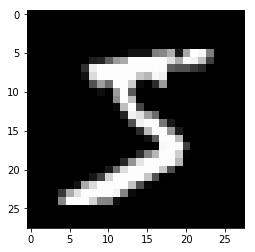

In [14]:
import matplotlib.pyplot as plt
img = training_data[0][1:].reshape(28,28) # 784개 데이터를 28 X 28행렬로 변경
plt.imshow(img, cmap='gray')
plt.show()

In [23]:
import numpy as np

# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [27]:
class NeuralNetwork:
    def __init__(self,input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        
        # 2층 hidden layer
        self.W2 = np.random.rand(self.input_nodes,self.hidden_nodes) # W2 = (784 X 100): 입력층 - 은닉층 사이의 가중치
        self.b2 = np.random.rand(self.hidden_nodes)                  # b2 = (100,)
        
        # 3층 output layer
        self.W3 = np.random.rand(self.hidden_nodes,self.output_nodes) # W3 = (100 X 10): 은닉층 - 출력층 사이의 가중치
        self.b3 = np.random.rand(self.output_nodes)                   # b3 = (10,)
        
        # 학습률
        self.learning_rate = 1e-4
        
        
    def feed_forward(self):
        delta = 1e-7 # log무한대 발산 방지
        z1 = np.dot(self.input_data, self.W2) + self.b2
        y1 = sigmoid(z1)
        
        z2 = np.dot(y1,self.W3) + self.b3
        y = sigmoid(z2)
        
        # cross-entropy
        return -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
    
    def loss_val(self):
        delta = 1e-7 # log무한대 발산 방지
        z1 = np.dot(self.input_data, self.W2) + self.b2
        y1 = sigmoid(z1)
        
        z2 = np.dot(y1,self.W3) + self.b3
        y = sigmoid(z2)
        
        # cross-entropy
        return -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )
        
    
    

    # 정확도 측정함수
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(input_data)):
                        
            label = int(target_data[index])
                        
            # normalize
            data = (input_data[index, :] / 255.0 * 0.99) + 0.01
      
            predicted_num = self.predict(data)
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", len(matched_list)/(len(input_data)) )
        
        return matched_list, not_matched_list, index_label_prediction_list
    
    def train(self, training_data):
        
        # normalize
        self.target_data = np.zeros(output_nodes) + 0.01
        self.target_data[int(training_data[0])] = 0.99
        
        self.input_data = (training_data[1:]/255.0 * 0.99) + 0.01 # 0과 1사이의 값으로 만드는 정규화 작업이 필요하다
                                                                    # 최댓값으로 나누어주는 방법 사용
        
        f = lambda x : self.feed_forward()

        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)

        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)        

    def predict(self, input_data):    
        z1 = np.dot(input_data, self.W2) + self.b2
        y1 = sigmoid(z1)

        z2 = np.dot(y1, self.W3) + self.b3
        y = sigmoid(z2)

        # MNIST 경우는 one-hot encoding 을 적용하기 때문에
        # 0 또는 1 이 아닌 argmax() 를 통해 최대 인덱스를 넘겨주어야 함
        predicted_num = np.argmax(y)

        return predicted_num
    
    def accuracy(self, test_data):
        matched_list = []
        not_matched_list = []
        
        for index in range(len(test_data)):
            lable = int(test_data[index,0])
            data = (input_data[index, :] / 255.0 * 0.99) + 0.01
            predicted_num = self.predict(data)

            if label == predicted_num:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
        print("Current Accuracy = ", len(matched_list)/(len(input_data)), '%' )
        
        return matched_list, not_matched_list

In [28]:
# 시간 매우 오래걸림

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

nn = NeuralNetwork(input_nodes,hidden_nodes,output_nodes)

for step in range(30001):
    index = np.random.randint(0, len(training_data)-1)
    nn.train(training_data[index])
    
    if step % 400 ==0:
        print('step = ',step,'loss_val = ',nn.loss_val())

step =  0 loss_val =  143.77341309854825


KeyboardInterrupt: 

In [ ]:

nn.accuracy(test_data)
